   # Cover Type Classification
   
   ### Objective: Build a deep learning model to predict the forest cover type from different cartographic variables.
   ### Given: 
       1. Cover Types: ['Spruce/Fir', 'Lodgepole Pine','Ponderosa Pine', 'Cottonwood/Willow','Aspen', 'Douglas-fir', 'Krummholz']
       2. A csv file ('cover_data.csv') that contains 581012 observations. Each observation has 55 columns (54 features and the last one being the class).
   ### Assumption(s):
       1. There are no separate test dataset. So, one must hold-out a small percentage of given input as test data.
       2. There is no information about the use of predictions. Hence, we do not know how what to focus on (precision or recall). Generally, it's a good idea to have both scores 'high'.
   ### Expected output: 
       1. A good model.
       2. Model performance over epochs (accuracy, loss plots)
       3. Some classification metrics (heatmap of confusion-matrix, classification-report etc).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
import io

In [ ]:
from google.colab import files
uploaded = files.upload()
# cover_data = pd.read_csv('cover_data.csv')
cover_data = pd.read_csv(io.BytesIO(uploaded['cover_data.csv']))
print(cover_data.shape)
print(cover_data.info())
print(cover_data.columns)

Saving cover_data.csv to cover_data.csv
(581012, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11 

In [ ]:
cover_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# converting the class label to a range of 0-6
le = LabelEncoder()
cover_data['class'] = le.fit_transform(cover_data['class'])


cover_data['class'].unique()

array([4, 1, 0, 6, 2, 5, 3])

In [ ]:
pd.set_option('max_columns', None)
display(cover_data.corr())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,0.131838,0.238164,0.066550,-0.619374,-0.204512,-0.187677,-0.182463,-0.183521,-0.150376,-0.214606,-0.002252,-0.003021,-0.060915,-0.428746,-0.134227,-0.118905,-0.043984,-0.080825,-0.007153,-0.059446,-0.111028,-0.081811,0.033144,-0.043128,0.017557,0.158959,0.124356,0.053582,0.028753,-0.016657,0.035254,-0.029270,0.074327,-0.026667,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,-0.140123,0.055988,0.074904,0.082687,-0.007574,-0.005649,-0.002730,0.017212,0.008938,0.010766,-0.005052,-0.003366,-0.020800,0.049835,-0.064344,-0.070209,0.054544,0.007597,-0.002660,0.007846,-0.000168,-0.028353,-0.003635,-0.029440,0.032998,0.021578,0.013676,0.018164,-0.003265,-0.010661,0.011328,0.027535,-0.062181,-0.028922,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,-0.234576,-0.036253,0.125663,0.255503,0.107847,-0.018553,0.125497,0.131847,0.072311,0.003673,-0.015661,-0.023359,-0.032752,0.244037,-0.050894,-0.169300,0.192423,0.000228,0.001081,-0.034791,-0.040208,-0.045851,-0.083743,-0.077582,-0.025461,-0.053396,-0.207397,0.082434,0.026364,-0.021449,0.043695,0.067052,-0.082941,0.075864,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.097124,0.055726,0.122028,-0.100433,-0.035096,-0.011569,-0.041211,-0.049071,-0.009370,-0.012916,0.004751,-0.000795,-0.021935,-0.071653,0.001399,0.014628,-0.002032,-0.038478,-0.002667,-0.067448,-0.071435,-0.013340,-0.043236,-0.078088,-0.039953,-0.051424,-0.132244,0.021927,0.016099,0.013408,0.052384,0.026210,-0.001025,-0.049960,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,-0.180710,-0.008709,0.146839,0.077792,0.015275,0.008954,0.008863,0.025066,0.026772,0.046259,-0.008485,-0.012915,-0.028476,0.055154,-0.020870,-0.044526,0.083482,-0.024281,-0.001744,-0.050909,-0.054191,-0.031692,-0.055635,-0.076727,-0.026116,-0.075679,-0.180098,0.037066,-0.013471,-0.011212,0.067086,0.071672,-0.075860,-0.011901,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,0.453913,-0.200411,-0.232933,-0.270349,-0.083585,-0.088026,-0.084988,-0.088524,-0.061607,-0.108328,0.020107,0.025805,-0.045813,-0.182955,-0.099293,0.054196,-0.054968,-0.033945,-0.003144,0.018083,-0.051825,-0.051243,0.068758,0.056595,-0.014890,0.046979,-0.007067,-0.032451,-0.034842,0.002521,0.003866,-0.032749,0.306324,0.077091,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hill

In [ ]:
# feature extraction, splitting, and standardizing 
features = cover_data.iloc[:, 0:-1]
labels = cover_data.iloc[:, -1]


x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

ct = ColumnTransformer([('numeric', StandardScaler(), features.columns)])

x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [ ]:
## Design the model
model = Sequential()
# add input layer
model.add(tf.keras.layers.InputLayer(input_shape = (x_train.shape[1],)))

# add hidden layers
model.add(tf.keras.layers.Dense(64, activation = 'relu'))

model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
# add output layer
model.add(tf.keras.layers.Dense(7, activation = 'softmax'))

# compile model
opt = tf.keras.optimizers.Adam(learning_rate = 0.003)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# adding Early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=30)


# Train and Evaluate model
history = model.fit(x_train, y_train, epochs = 50, batch_size = 16, verbose = 1, callbacks = [es], validation_split = 0.1)

# additional statistics
y_estimate = model.predict(x_test, verbose = 0)
y_estimate = np.argmax(y_estimate, axis=1)
print(classification_report(y_test, y_estimate))


Epoch 1/50
22878/22878 [==============================] - 48s 2ms/step - loss: 0.7124 - accuracy: 0.7053 - val_loss: 0.5257 - val_accuracy: 0.7762
Epoch 2/50
22878/22878 [==============================] - 46s 2ms/step - loss: 0.5739 - accuracy: 0.7650 - val_loss: 0.4977 - val_accuracy: 0.7906
Epoch 3/50
22878/22878 [==============================] - 45s 2ms/step - loss: 0.5448 - accuracy: 0.7791 - val_loss: 0.4839 - val_accuracy: 0.7993
Epoch 4/50
22878/22878 [==============================] - 45s 2ms/step - loss: 0.5270 - accuracy: 0.7889 - val_loss: 0.4591 - val_accuracy: 0.8071
Epoch 5/50
22878/22878 [==============================] - 45s 2ms/step - loss: 0.5218 - accuracy: 0.7906 - val_loss: 0.4686 - val_accuracy: 0.8085
Epoch 6/50
22878/22878 [==============================] - 44s 2ms/step - loss: 0.5124 - accuracy: 0.7970 - val_loss: 0.4434 - val_accuracy: 0.8207
Epoch 7/50
22878/22878 [==============================] - 45s 2ms/step - loss: 0.5078 - accuracy: 0.7975 - val_loss: 0

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose = 1)
print('loss:', loss, 'Accuracy', acc)

5447/5447 [==============================] - 8s 2ms/step - loss: 0.4117 - accuracy: 0.8395
loss: 0.41170769929885864 Accuracy 0.8394873142242432


In [ ]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    
    if param == 'acc':
        ax = plt.subplot()
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        ax = plt.subplots()
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

In [ ]:
def plot_heatmap(class_names, y_pred, y_test):
    """
    Function to compute a Confusion Matrix and plot a heatmap based on the matrix.
    input: class names, y-predicted, y-test (ground-truth)
    output: a PNG file of the heatmap.
    """
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    # Save the heatmap to file
    heatmapfig = heatmap.get_figure()
    heatmapfig.savefig(f'confusion_matrix.png')

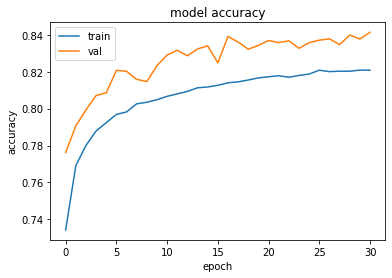

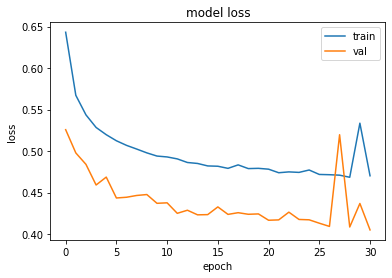

Test loss: 0.41170769929885864
Test accuracy: 0.8394873142242432
                   precision    recall  f1-score   support

       Spruce/Fir       0.90      0.80      0.85     63556
   Lodgepole Pine       0.83      0.93      0.88     85078
   Ponderosa Pine       0.64      0.95      0.77     10638
Cottonwood/Willow       0.90      0.34      0.49       795
            Aspen       0.79      0.29      0.43      2941
      Douglas-fir       0.68      0.11      0.19      5227
        Krummholz       0.91      0.79      0.84      6069

         accuracy                           0.84    174304
        macro avg       0.81      0.60      0.63    174304
     weighted avg       0.84      0.84      0.83    174304



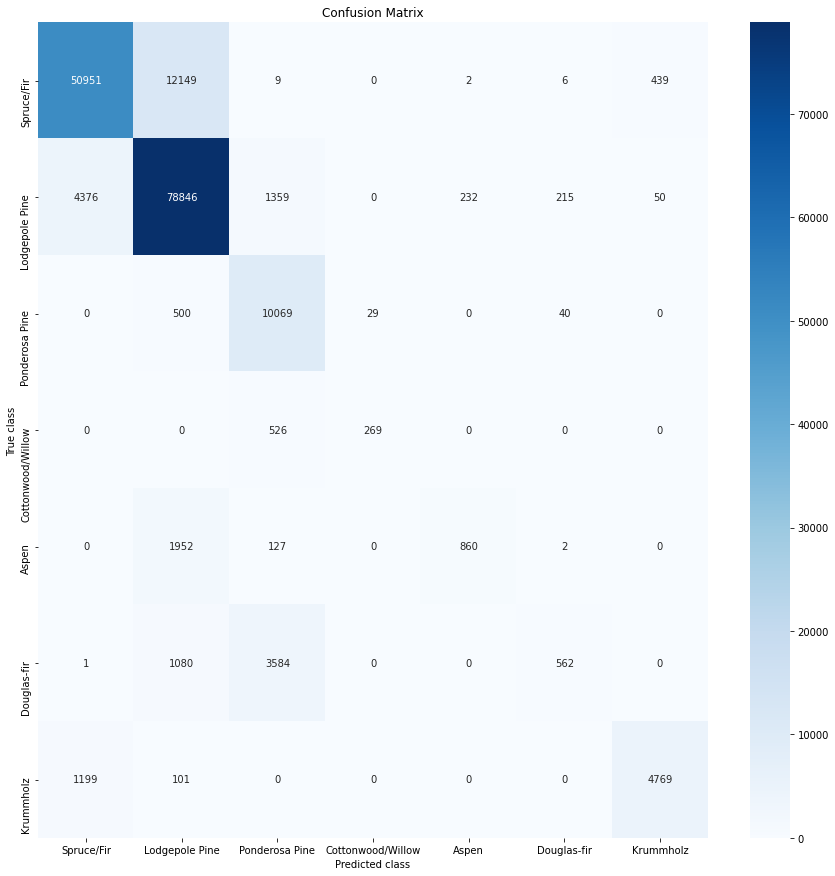

In [ ]:
plot_history(history, 'acc')
plot_history(history, 'loss')

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

y_pred = model.predict(x_test)

# Convert the pred to discrete values
y_pred = np.argmax(y_pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
               'Ponderosa Pine', 'Cottonwood/Willow',
               'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_test, y_pred, target_names=class_names))
plot_heatmap(class_names, y_pred, y_test)

### Conclusions: 
The numbers along the diagonal of the heatmap show how many were correctly classified. All other numbers on either sides of the diagonal show mis-classifications. We see that Lodgepole Pine, Cottonwood Willow, Aspen, and Douglas-Fir suffer from a high percentage of mis-classifications. To investigate the possible causes, one can explore the following:

1. Check the proportion of observations for each cover-type. Imbalances in the dataset will affect classification.
2. How each wilderness area is distributed.
3. Find the similarties among different cover-types (correlation, scatter-plots, etc.) These similarities might be one of the reasons the model might be tripping-up. There are ways to address it - one of it is to carefully remove all of the collinear variables, leaving only one.
4. Remove noise, inconsistent data and errors in training data - this should be done carefully with domain experts.
5. Try to use some other performance metric other than 'accuracy'. It fails to be a reliable metric when data in imbalanced. That is why we have other metrics such as Precision/Recall, F1-score etc.
6. Try resampling the data (undersample or oversample appropriately or stratified). Downsampling could be done with thresholding.

The most important thing to understand here is that in deep-learning, the gradient(s) of the majority class(es) dominate(s) and will influence the weight-updates. There are also some advanced techniques that will ameliorate this situation.